## 3400 Academic Project

Name: Muneeb Ur Rehman

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv('wine-data-set .csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Datatype Info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 606.0 KB


## Preprocessing the Dataset

In [4]:
#Check for the null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

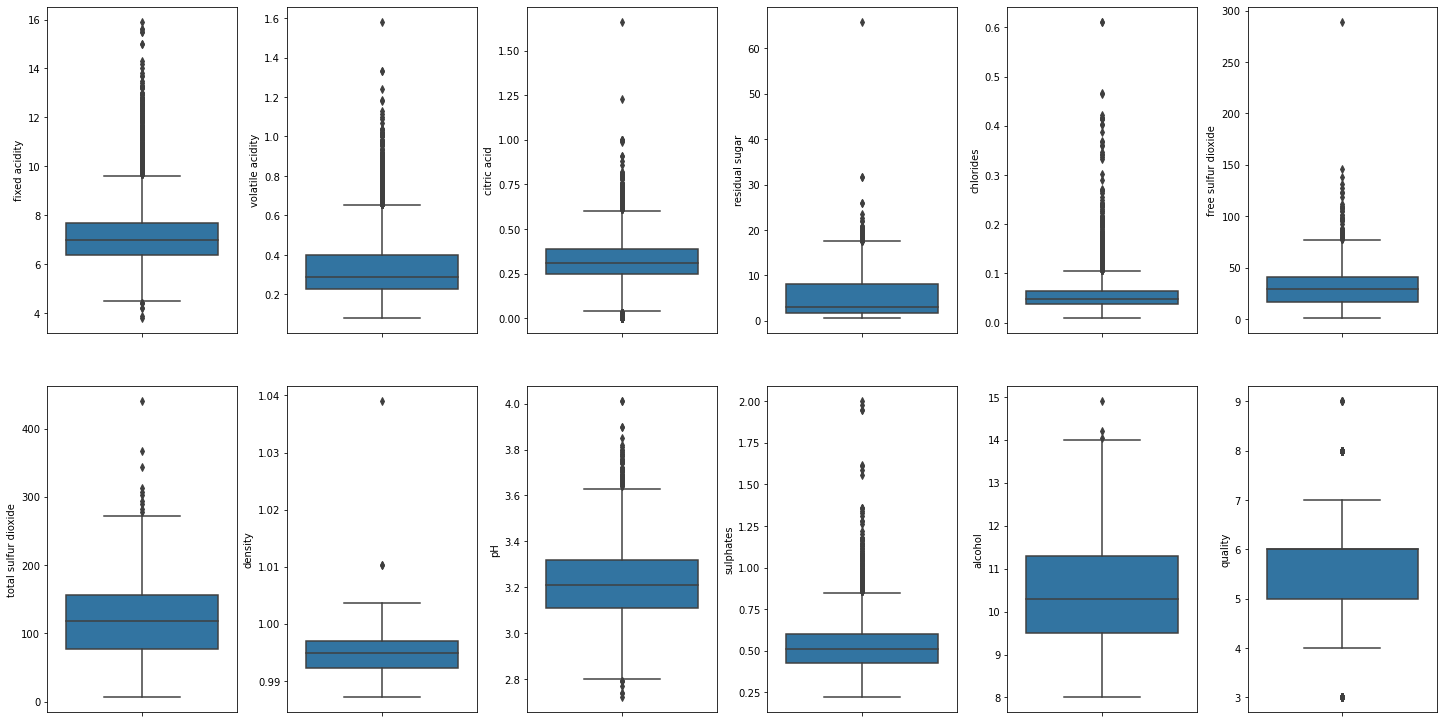

In [5]:
# Create box-plots to check for outliers
fig, ax = plt.subplots(ncols = 6, nrows = 2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, values in df.items():
    if col != 'type':
        sns.boxplot(y = col, data = df, ax = ax[index])
        index += 1

plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

<AxesSubplot:xlabel='quality', ylabel='count'>

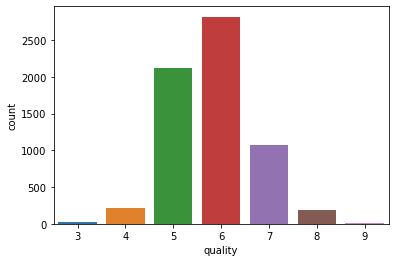

In [6]:
sns.countplot(df['quality'])

<AxesSubplot:>

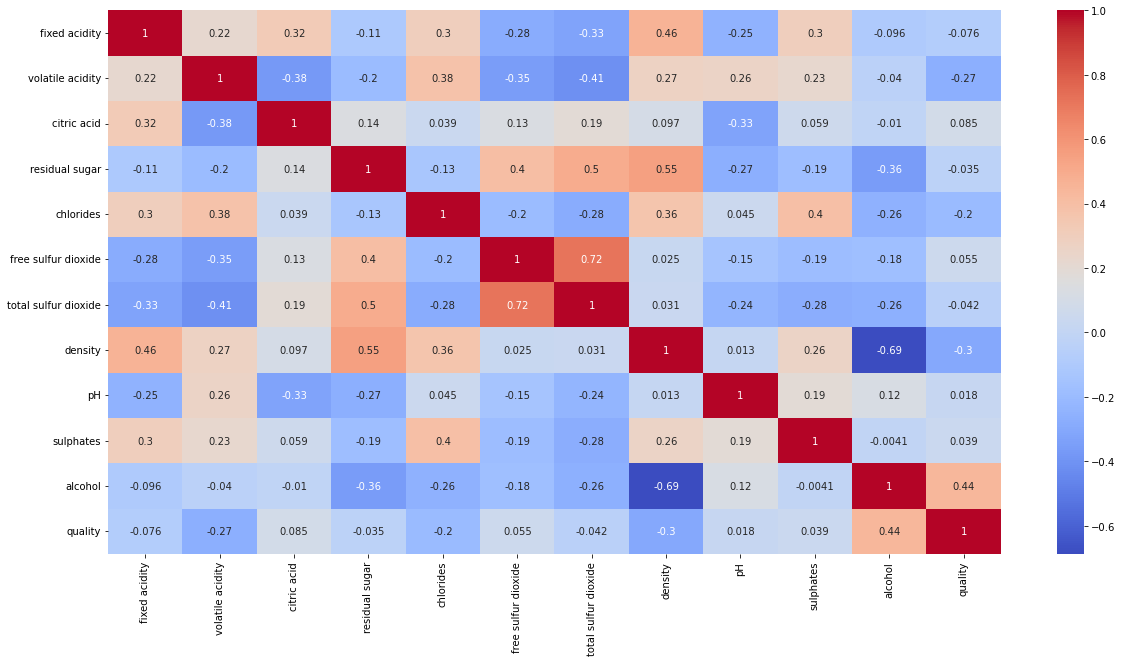

In [7]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

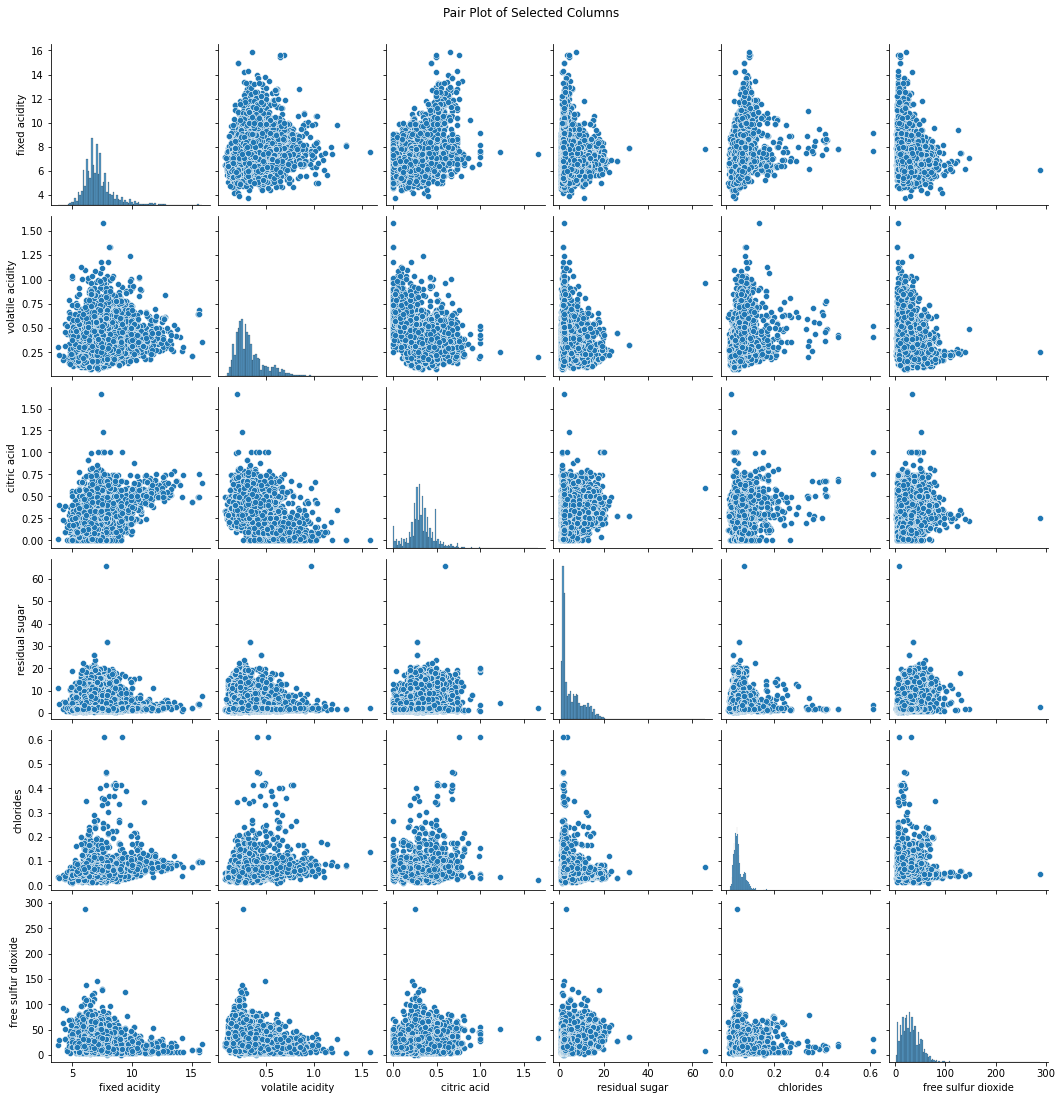

In [8]:
# Sample: Select a subset of columns for visualization
selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide']

# Create a pair plot
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()

## The Initial Model

In [9]:
def accuracy_model(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

    # train the model
    model.fit(X_train, y_train)
    print("Bottom-line Accuracy:", model.score(X_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [10]:
#initial model for quality
X = df.drop('quality', axis = 1)
y = df['quality']

initial_model = LogisticRegression()
accuracy_model(initial_model,X,y)

Bottom-line Accuracy: 45.86233565351895
CV Score: 45.39716118465948


## Transformation of The Predicator

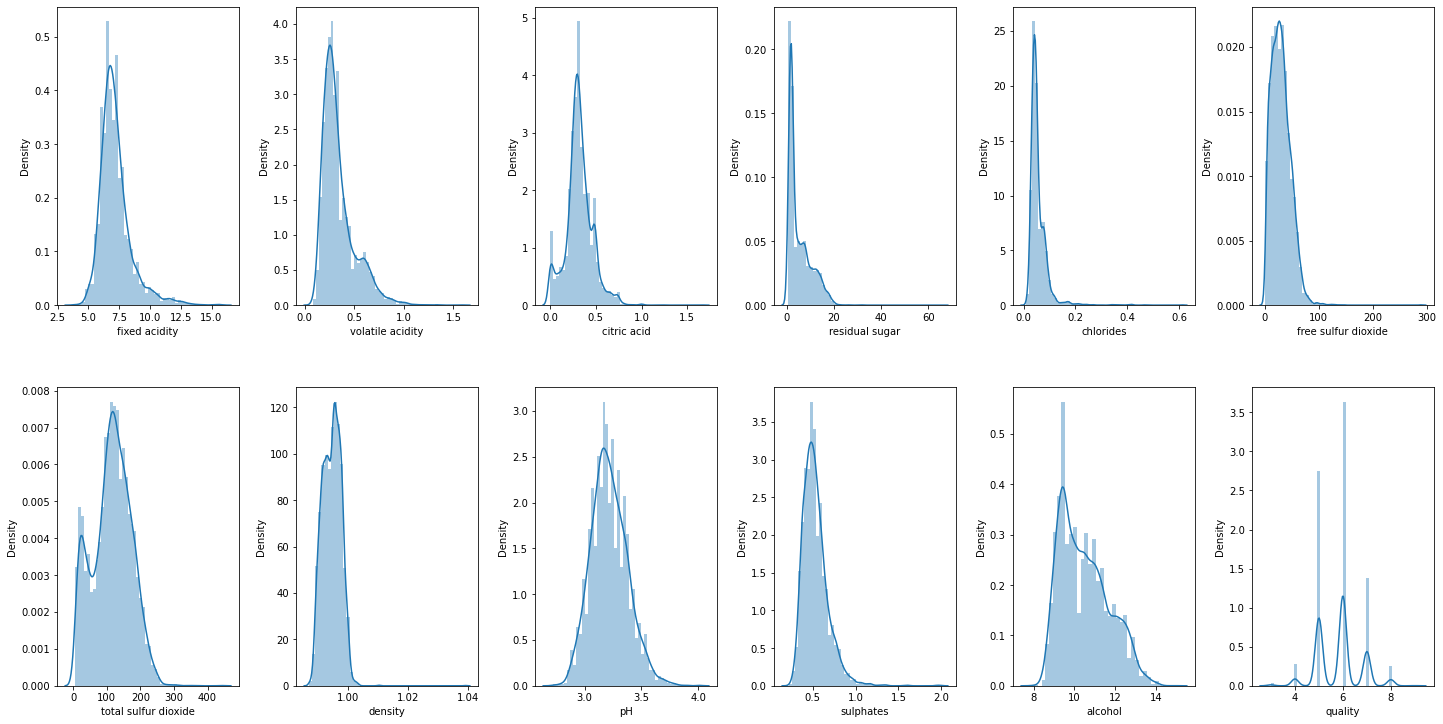

In [11]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## First Predicator

In [12]:
def transformed_accuracy_model(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

    # train the model
    model.fit(X_train, y_train)
    print("Transformed-predicator Accuracy:", model.score(X_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [13]:
# yeojohnson Transformation
df_duplicate = df.copy(deep = True)
df_duplicate['residual sugar'], lmbda = yeojohnson(1 + df_duplicate['residual sugar'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

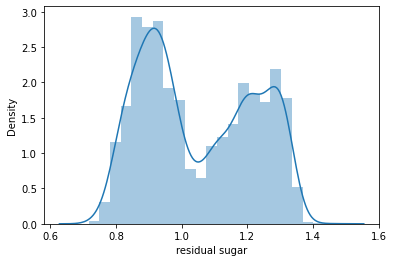

In [14]:
sns.distplot(df_duplicate['residual sugar'])

In [15]:
x1 = df_duplicate.drop('residual sugar', axis = 1)
Y1 = df['quality']

first_model = LogisticRegression()
transformed_accuracy_model(first_model,x1,Y1)

Transformed-predicator Accuracy: 68.98685228151585
CV Score: 66.68622901596835


## Second Predicator

In [16]:
# log Transformation
df_duplicate = df.copy(deep = True)
df_duplicate['free sulfur dioxide'] = np.log(1 + df_duplicate['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

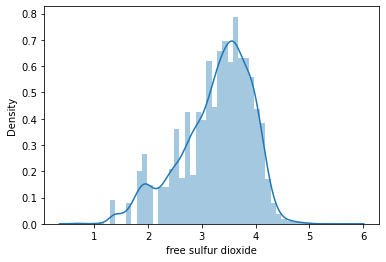

In [17]:
sns.distplot(df_duplicate['free sulfur dioxide'])

In [18]:
x2 = df_duplicate.drop('free sulfur dioxide', axis = 1)
Y2 = df['quality']

second_model = LogisticRegression()
transformed_accuracy_model(second_model,x2,Y2)

Transformed-predicator Accuracy: 68.21345707656613
CV Score: 64.16265003986696


## Third Predicator

In [19]:
# log Transformation
df_duplicate = df.copy(deep = True)
df_duplicate['total sulfur dioxide'] = np.log(1 + df_duplicate['total sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

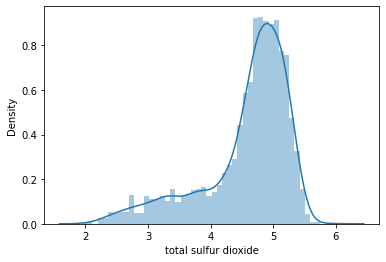

In [20]:
sns.distplot(df_duplicate['total sulfur dioxide'])

In [21]:
x3 = df_duplicate.drop('total sulfur dioxide', axis = 1)
Y3 = df['quality']

third_model = LogisticRegression()
transformed_accuracy_model(third_model,x3,Y3)

Transformed-predicator Accuracy: 85.1508120649652
CV Score: 82.2357945498385


## Fourth Predicator

In [22]:
# Box-cox Transformation
df_duplicate = df.copy(deep = True)
df_duplicate['residual sugar'], lambda_value = boxcox(df_duplicate['residual sugar'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

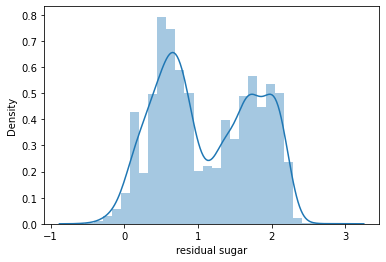

In [23]:
sns.distplot(df_duplicate['residual sugar'])

In [24]:
x4 = df_duplicate.drop('residual sugar', axis = 1)
Y4 = df['quality']

fourth_model = LogisticRegression()
transformed_accuracy_model(fourth_model,x4,Y4)

Transformed-predicator Accuracy: 68.98685228151585
CV Score: 66.68622901596835


## Fifth Predicator

In [25]:
# Box-cox Transformation
df_duplicate = df.copy(deep = True)
df_duplicate['fixed acidity'], lambda_value = boxcox(df_duplicate['fixed acidity'])

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

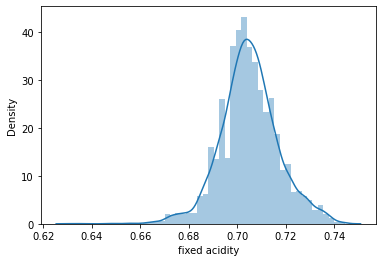

In [26]:
sns.distplot(df_duplicate['fixed acidity'])

In [27]:
x5 = df_duplicate.drop('fixed acidity', axis = 1)
Y5 = df['quality']

fifth_model = LogisticRegression()
transformed_accuracy_model(fifth_model,x5,Y5)

Transformed-predicator Accuracy: 71.92575406032483
CV Score: 65.78525951838789


## Feature Selection

In [28]:
def selection_accuracy_model(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

    # train the model
    model.fit(X_train, y_train)
    print("Feature-Selection Accuracy:", model.score(X_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [29]:
# This model drops the right skewed pradicator
df_duplicate = df.copy(deep = True)
x6 = df_duplicate.drop(columns = ['chlorides'])
Y6 = df['quality']

sixth_model = LogisticRegression()
selection_accuracy_model(sixth_model,x6,Y6)

Feature-Selection Accuracy: 65.58391337973704
CV Score: 65.21631121614601


In [30]:
# This model drops multiple right skewed pradicators
df_duplicate = df.copy(deep = True)
x7 = df_duplicate.drop(columns = ['chlorides','sulphates','residual sugar'])
Y7 = df['quality']

seventh_model = LogisticRegression()
selection_accuracy_model(seventh_model,x7,Y7)

Feature-Selection Accuracy: 67.98143851508121
CV Score: 65.46396529059786


In [31]:
# This model drops the predicator with more standard deviation
df_duplicate = df.copy(deep = True)
x8 = df_duplicate.drop(columns = ['alcohol','free sulfur dioxide','total sulfur dioxide'])
Y8 = df['quality']

eight_model = LogisticRegression()
selection_accuracy_model(eight_model,x8,Y8)

Feature-Selection Accuracy: 95.51430781129156
CV Score: 90.57503010973592


In [32]:
# This model drops the predicators with a normal distributed graphs
df_duplicate = df.copy(deep = True)
x9 = df_duplicate.drop(columns = ['fixed acidity','alcohol','pH'])
Y9 = df['quality']

nineth_model = LogisticRegression()
selection_accuracy_model(nineth_model,x9,Y9)

Feature-Selection Accuracy: 57.076566125290014
CV Score: 48.734804460311416


In [33]:
# This model drops the values with less standard deviations
df_duplicate = df.copy(deep = True)
x10 = df_duplicate.drop(columns = ['chlorides','density','volatile acidity'])
Y10 = df['quality']

tenth_model = LogisticRegression()
selection_accuracy_model(tenth_model,x10,Y10)

Feature-Selection Accuracy: 68.21345707656613
CV Score: 64.52020764344326



With a cross-validation score of 45.40% and a bottom-line accuracy of 45.86%, the original logistic regression model was trained on all features. Subsequent use of different feature selection and data transformation methods showed appreciable increases in prediction accuracy. The feature selection method that eliminated the terms "alcohol," "free sulphur dioxide," and "total sulphur dioxide" yielded a significant improvement, attaining an astounding accuracy rate of 95.51%. This comparison shows how important it is to choose features carefully in order to improve the model's performance after it has been started.

The Box-Cox transformation on "total sulphur dioxide" produced the best accuracy of all the transformation techniques used, coming in at 85.15%. This performed better than other transformations, like the log transformation on "residual sugar" (68.99%) and "free sulphur dioxide" (68.21%). It's interesting to note that the "total sulphur dioxide" log transformation showed the biggest improvement, highlighting the variation in the effects of various transformations on various variables. This internal comparison highlights how critical it is to customize transformation decisions according to the unique properties and distributions of individual features.

When comparing feature selection strategies, the largest accuracy increase (95.51%) was obtained by removing the terms "alcohol," "free sulphur dioxide," and "total sulphur dioxide." On the other hand, alternative feature selection strategies, like eliminating the terms "fixed acidity," "alcohol," and "pH," showed a drop in accuracy to 57.08%. This internal assessment highlights the need of carefully weighing each feature's relevance to the predictive task and the nuanced effects of each feature selection strategy. It also emphasizes the need to make a wise decision because not all feature selection techniques result in advancements.

When comparing the effects of transformations with feature selection, it becomes clear that some transformations, like the log transformation on "residual sugar" and the Box-Cox transformation on "total sulphur dioxide," each independently produced significant accuracy gains. Nevertheless, the feature selection approach that eliminated "alcohol," "free sulphur dioxide," and "total sulphur dioxide" produced the greatest accuracy improvement. This comparison indicates that feature selection is still a powerful method for enhancing overall model performance by highlighting the significance of particular variables in the prediction task, even though transformations can improve the representational power of individual features. Combining the two approaches could offer a thorough method for improving predictive models depending on the special qualities of the dataset.